In [2]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import cv2
from matplotlib import pyplot as plt

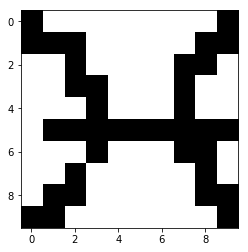

In [31]:
im1 = cv2.imread("pic/Pisces.bmp")

plt.imshow(im1)

Now, we will convert the values : [255 2255 255] is white, so 0, and [1 1 1] is black, so 1. This part isn't necessary, but it make sit easier to understand what we are doing.

In [32]:
def convert_binary(image):
    white = np.array([255, 255, 255])
    res = list([[0 for i in range(len(image))] for j in range(len(image[0]))])
    for i in range(len(image)):
        for j in range(len(image[0])):
            if np.allclose(image[i][j], white):
                res[i][j] = 0
            else:
                res[i][j] = 1
    return(res)

In [33]:
def get_potential(image, n, conv_bin = True):
    if conv_bin :
        image = convert_binary(image)
    height, width = len(image), len(image[0])
    res = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            # here we will modifie the value of res[i][j]
            for u in range(-n, n+1):
                for v in range(-n, n+1):
                    # deal with values out of bounds
                    try:
                        val = image[i+u][j+v]
                    except:
                        val = 0
                    # python accepts negativ values and deals with it but it's not what we want
                    if i+u<0 or j+v < 0:
                        val = 0
                    if u == 0 and v == 0:
                        res[i,j] += val
                    else:
                        res[i,j] += val/2
    return(res)

print(get_potential(im1, 1))
print(im1.shape[:2])

[[2.  2.  1.  0.5 0.  0.  0.  0.5 1.5 2. ]
 [2.  3.  2.  1.  0.  0.  0.5 1.5 3.  2.5]
 [1.  2.5 3.  2.  0.5 0.  1.  2.5 3.  1.5]
 [0.  1.  2.5 2.5 1.  0.  1.5 2.5 2.  0.5]
 [0.5 1.5 3.  3.5 2.5 1.5 2.5 3.  2.5 1. ]
 [0.5 1.5 3.  3.  3.  2.  3.  3.5 3.5 2. ]
 [0.5 1.5 2.5 3.  2.  1.5 2.  3.5 3.5 2. ]
 [0.5 1.5 2.5 1.5 0.5 0.  0.5 2.  3.  2. ]
 [1.5 3.  2.5 1.  0.  0.  0.  1.  2.5 2.5]
 [2.  2.5 1.5 0.5 0.  0.  0.  0.5 1.5 2. ]]
(10, 10)


Finaly, we can make the picture comparison function and test it

In [39]:
def compare(im1, im2, pot_function = get_potential, n = 3):
    if im1.shape != im2.shape:
        im2 = cv2.resize(im2, dsize=im1.shape[:2], interpolation=cv2.INTER_CUBIC)
    pot1 = pot_function(im1, n)
    pot2 = pot_function(im2, n)
    return(np.sum(np.square(pot1 - pot2)))

tests = [cv2.imread("pic/test" + str(i) + ".bmp") for i in range(1,4)]

for i in range(len(tests)):
    print("test image" + str(i+1) + " : the distance is " + str(compare(im1, tests[i])))

test image1 : the distance is 1066.5
test image2 : the distance is 1343.0
test image3 : the distance is 2147.0


The lowest distance is obtained for "test1.bmp", which is the expected result

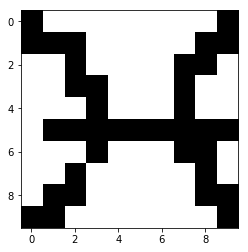

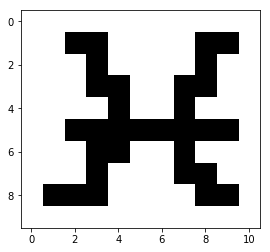

In [45]:
plt.imshow(im1)
plt.show()
plt.imshow(tests[0])